In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

In [2]:
data_frame = pd.read_csv('data-indeks-standar-pencemar-udara-tahun-2017.csv')
data_frame[['pm10', 'so2', 'co', 'o3', 'no2', 'max', 'kategori']].sample(100)

,pm10,so2,co,o3,no2,max,kategori
1069,12,0,12,61,3,61,SEDANG
788,55,31,22,98,11,98,SEDANG
1595,70,17,41,105,14,105,TIDAK SEHAT
71,53,9,24,60,5,60,SEDANG
576,51,30,0,123,12,123,TIDAK SEHAT
...,...,...,...,...,...,...,...
53,52,7,27,71,7,71,SEDANG
209,38,16,18,55,5,55,SEDANG
451,68,23,18,85,16,85,SEDANG
46,36,7,19,38,3,38,BAIK


In [3]:
predictors = data_frame[['pm10', 'so2', 'co', 'o3', 'no2', 'max']]
targets = data_frame.kategori
x_train, x_test, y_train, y_test = train_test_split(predictors, targets, test_size=.2, random_state=0)
print('x_train = ', x_train.shape)
print('x_test = ', x_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

x_train =  (1460, 6)
x_test =  (365, 6)
y_train =  (1460,)
y_test =  (365,)


In [4]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

GaussianNB()

In [5]:
gaussian.score(x_train, y_train)

0.9609589041095891

In [6]:
gaussian.score(x_test, y_test)

0.947945205479452

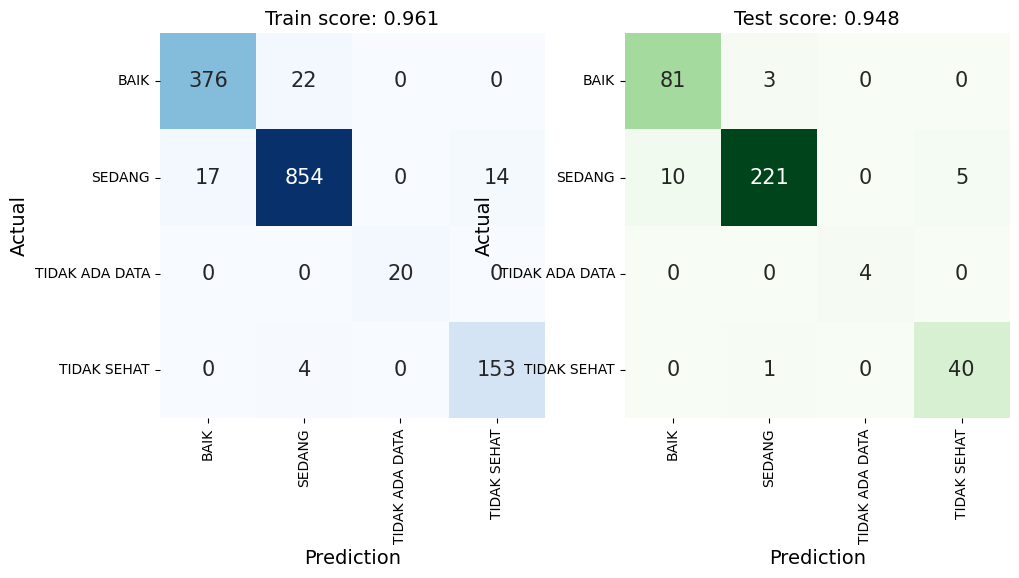

In [7]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(x_train, y_train, x_test, y_test, gaussian)

In [8]:
prediction = pd.read_excel('testing.xlsx')
prediction[['pm10', 'so2', 'co', 'o3', 'no2', 'max']]

,pm10,so2,co,o3,no2,max
0,63,34,25,21,2,63


In [9]:
gaussian.predict(prediction)

array(['SEDANG'], dtype='<U14')

In [10]:
prediction['kategori'] = gaussian.predict(prediction)
prediction

,pm10,so2,co,o3,no2,max,kategori
0,63,34,25,21,2,63,SEDANG
